## Homework 03: due 2022/04/20 23:59(100%)

### - Tutorial : 
___1. scipy.signal.convolve2d:___ https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

___2. OpenCV2 Convolution:___ https://blog.csdn.net/hysterisis/article/details/113097507

___3. cv2.filter2D:___ https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04 
                   
### - After you go through the tutorials, you should be able to work on this assignment.

### - Please answer the following questions and work directly on this jupyter notebook.

### - Make sure the code can be run and show the result and figures properly.

### - Please write down your observation with markdown in this notebook briefly.

In [1]:
import cv2
import os
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

#### 1. Please use the defined input matrix and the kernel below, and use the ___scipy.signal.convolve2d___ and ___cv2.filter2D___ to implement the convolution operation. The result output after convolution is given for your reference. (With half zero padding to make the shape fixed) (50%)

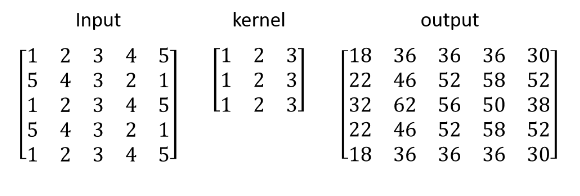

In [28]:
# Do not change this block
kernel = np.array([[1,2,3],
                  [1,2,3],
                  [1,2,3]])

input = np.zeros((5, 5))
for i in range(5):
    for j in range(5):
        if i%2 == 0:
            input[i][j] = j+1
        else:
            input[i][j] = 5-j

In [49]:
output = signal.convolve2d(input, kernel, mode='same')
print("scipy.signal.convolve2d:\n", output)
print("\n")

# in filter2D, zero padding is not supported so we need to pad the input
w, h = input.shape
input_padded = cv2.copyMakeBorder(input, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)
output = cv2.filter2D(input_padded, -1, kernel)[1: w+1, 1: h+1]
print("cv2.filter2D (cross-correlation):\n", output)
print("\n")

# flip the kernel horizontally and vertically to implement traditional convolution
f_kernel = np.flipud(np.fliplr(kernel))
output = cv2.filter2D(input_padded, -1, f_kernel)[1: w+1, 1: h+1]
print("cv2.filter2D (traditional convolution):\n", output)

scipy.signal.convolve2d:
 [[18. 36. 36. 36. 30.]
 [22. 46. 52. 58. 52.]
 [32. 62. 56. 50. 38.]
 [22. 46. 52. 58. 52.]
 [18. 36. 36. 36. 30.]]


cv2.filter2D (cross-correlation):
 [[30. 36. 36. 36. 18.]
 [38. 50. 56. 62. 32.]
 [52. 58. 52. 46. 22.]
 [38. 50. 56. 62. 32.]
 [30. 36. 36. 36. 18.]]


cv2.filter2D (traditional convolution):
 [[18. 36. 36. 36. 30.]
 [22. 46. 52. 58. 52.]
 [32. 62. 56. 50. 38.]
 [22. 46. 52. 58. 52.]
 [18. 36. 36. 36. 30.]]


#### 2. Please do the convolution operation on your own image or on the give __test.jpg__. Using all the kernels below, and save each filtered image in ___.png___ file with the corresponding kernel names. Also, move all the filtered images to a folder. (50%)

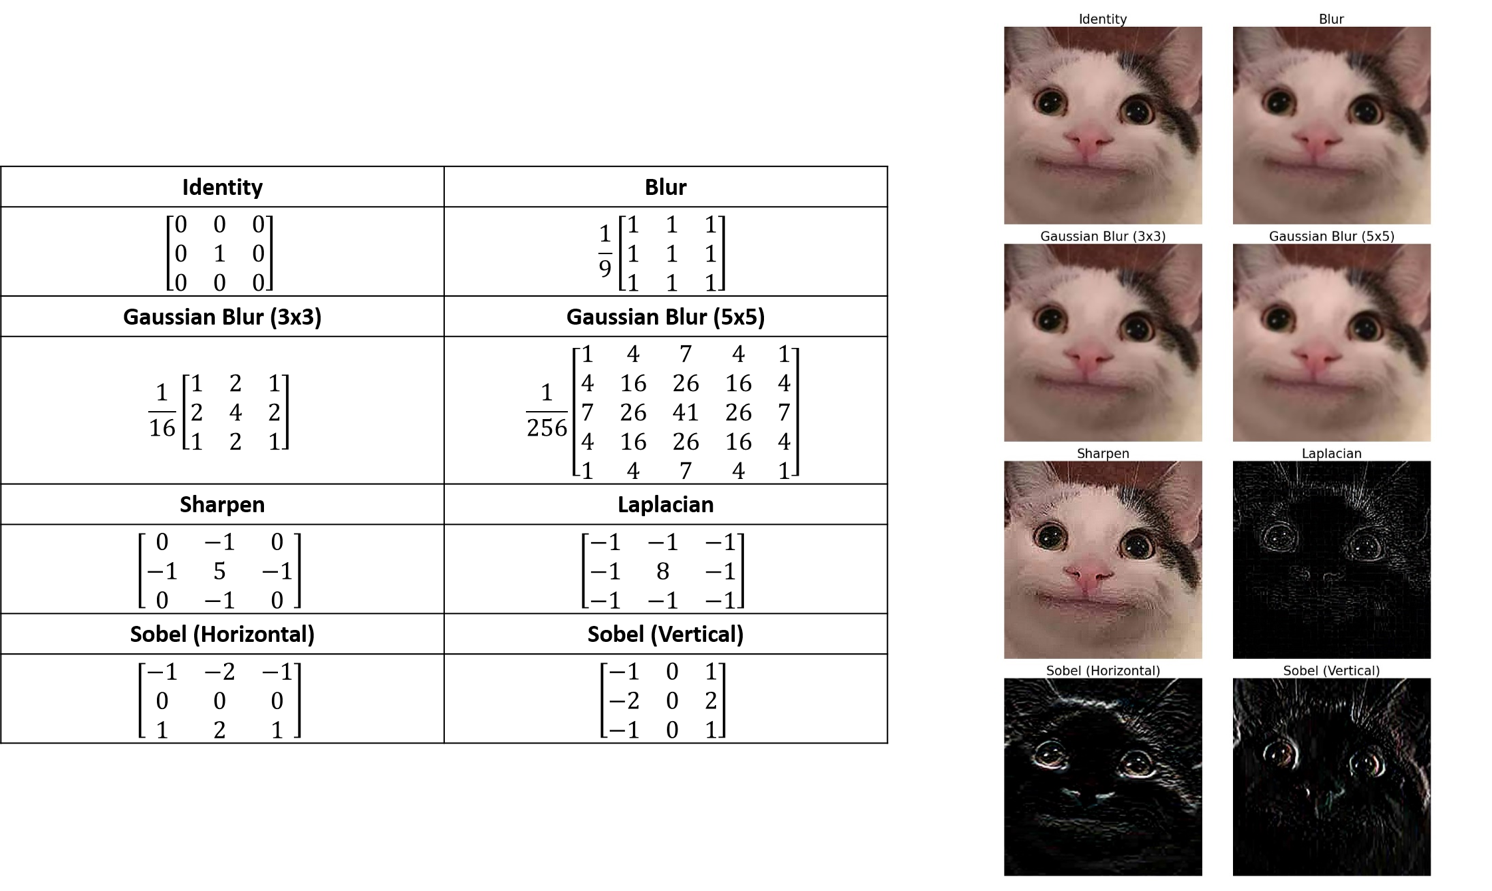

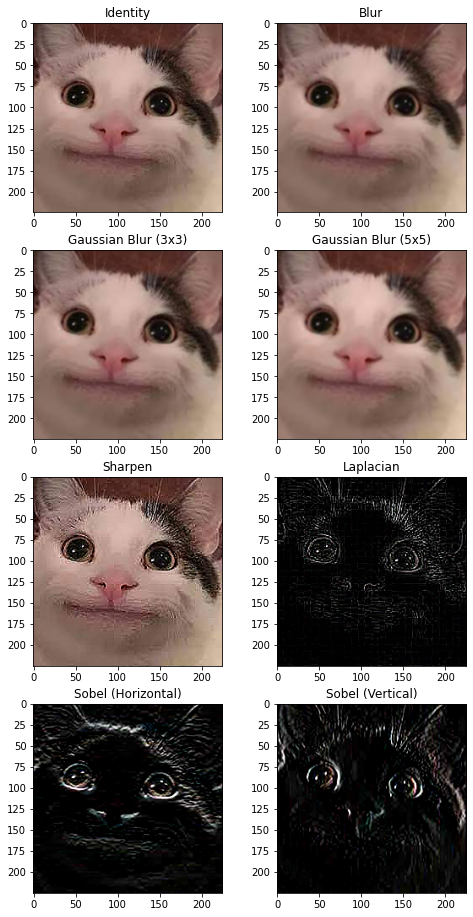

In [68]:
idendity = np.array([[0,0,0],
                     [0,1,0],
                     [0,0,0]])
blur = np.array([[1,1,1],
                 [1,1,1],
                 [1,1,1]]) / 9
gaussian3 = np.array([[1,2,1],
                      [2,4,2],
                      [1,2,1]]) / 16
gaussian5 = np.array([[1,4,7,4,1],
                      [4,16,26,16,4],
                      [7,26,41,26,7],
                      [4,16,26,16,4],
                      [1,4,7,4,1]]) / 256
sharpen = np.array([[0,-1,0],  
                    [-1,5,-1],
                    [0,-1,0]])
laplacian = np.array([[-1,-1,-1],
                      [-1,8,-1],
                      [-1,-1,-1]])
sobel_x = np.array([[-1,0,1],
                    [-2,0,2],
                    [-1,0,1]])
sobel_y = np.array([[-1,-2,-1],
                    [0,0,0],
                    [1,2,1]])
kdict = {"Identity": idendity, "Blur": blur, 
            "Gaussian Blur (3x3)": gaussian3, "Gaussian Blur (5x5)": gaussian5, 
            "Sharpen": sharpen, "Laplacian":laplacian, 
            "Sobel (Horizontal)": sobel_y, "Sobel (Vertical)": sobel_x}
            
# do convolution with above kernels
# here we use cv2.filter2D since almost all the kernels remain the same after flipping
img = cv2.cvtColor(cv2.imread('./test.jpg'), cv2.COLOR_BGR2RGB)
fig, axes = plt.subplots(4, 2, figsize=(8, 16))
for i ,k in enumerate(kdict.items()):
    ax = axes[i//2][i%2]
    kname, kernel = k[0], k[1]
    output = cv2.filter2D(img, -1, kernel)
    ax.imshow(output)
    ax.set_title(kname)
    os.makedirs('./output', exist_ok=True)
    plt.imsave('./output/'+kname+'.jpg', output)


### Observation:
1. Idendity: Feature map remains the same after filtering.
2. Blur: Feature map becomes more blurred after low pass filtering.
3. Gaussian Blur (3x3) vs Gaussian Blur (5x5): The greater the size of Gaussian kernel is, the more blurred feature map we get.
4. Sharpen: Feature map becomes more sharpened after high pass filtering.
5. Laplacian: Detect edges vertically and horizontally instead of the diagonals.
6. Sobel (Horizontal): Detect edges horizontally and get thicker edges than Laplacian.
7. Sobel (Vertical): Detect edges vertically and get thicker edges than Laplacian. 
